## Library:

In [ ]:
!pip install wget

In [ ]:
! pip install fastprogress
from fastprogress import master_bar, progress_bar

In [ ]:
import wget
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import numpy as np
import re
import string
import random as rd
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [ ]:
anime_path_url="https://github.com/HTL2910/Graph-based-recommend-system-using-GNN/blob/main/anime.csv"
rating_path_url="https://github.com/HTL2910/Graph-based-recommend-system-using-GNN/blob/main/rating.csv"

In [ ]:
#wget.download(anime_path_url, out='./anime.csv')
#wget.download(rating_path_url, out='./rating.csv')

#anime_df = pd.read_csv('./anime.csv')
#rating_df = pd.read_csv('./rating.csv')
anime_df = pd.read_csv('/content/anime.csv')
rating_df = pd.read_csv('/content/rating.csv')

## Exploration Data Analysis

In [ ]:
def some_infomation_dataset(df):
  print('Head: ')
  display(df.head(5))
  print('*********************************')
  print('Tail: ')
  display(df.tail(5))
  print('*********************************')
  print('Name of each columns in dataset',df.columns)
  print('*********************************')
  print('Types of columns: \n',df.dtypes)
  print('*********************************')
  print('Some Infomation of dataset \n',df.info())
  print('*********************************')
  print('Describe of dataset: \n',df.describe())
  print('*********************************')
  print('The number of duplicate values in dataset',df.duplicated().sum())
  print('*********************************')
  print('The number of missing values in the dataset:\n',df.isnull().sum())
  print('*********************************')
  print('The number of index in dataset:',df.index)
  print('*********************************')
  print('The number of unique valuess each columns in dataset: ')
  for i in range(len(df.columns)):
    print(df[df.columns[i]].value_counts().name,' : ',
        len(df[df.columns[i]].value_counts()))
  print('*********************************')

In [ ]:
def type_data_df(df):
  categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
  numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]
  print('Categorical columns: ',categorical_cols)
  print('Numerical columns: ',numerical_cols)
def unique_data(df):
    len_df=len(df.columns)
    dic = dict()
    for i in range(len_df):
        dic[df.columns[i]]=df[df.columns[i]].sort_values().unique()
    return dic

In [ ]:
some_infomation_dataset(anime_df)
type_data_df(anime_df)
print("anime data unique:")
unique_data(anime_df)

Head: 


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


*********************************
Tail: 


,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


*********************************
Name of each columns in dataset Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')
*********************************
Types of columns: 
 anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object
*********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
Some Infomation of dataset 
 None
*********************************
Describ

{'anime_id': array([    1,     5,     6, ..., 34522, 34525, 34527]),
 'name': array(['&quot;0&quot;',
        '&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu',
        '&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi', ...,
        'Üks Uks', 'ēlDLIVE', '◯'], dtype=object),
 'genre': array(['Action', 'Action, Adventure',
        'Action, Adventure, Cars, Comedy, Sci-Fi, Shounen', ..., 'Vampire',
        'Yaoi', nan], dtype=object),
 'type': array(['Movie', 'Music', 'ONA', 'OVA', 'Special', 'TV', nan], dtype=object),
 'episodes': array(['1', '10', '100', '1006', '101', '102', '103', '104', '105', '108',
        '109', '11', '110', '112', '113', '114', '115', '117', '119', '12',
        '120', '124', '125', '127', '1274', '128', '13', '130', '1306',
        '132', '136', '137', '14', '140', '141', '142', '1428', '143',
        '145', '147', '1471', '148', '15', '150', '151', '153', '154',
        '155', '156', '1565', '16', '161', '162', '163', '164', '167',
       

In [ ]:
some_infomation_dataset(rating_df)
type_data_df(rating_df)
print("rating data unique:")
unique_data(rating_df)

Head: 


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


*********************************
Tail: 


,user_id,anime_id,rating
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9


*********************************
Name of each columns in dataset Index(['user_id', 'anime_id', 'rating'], dtype='object')
*********************************
Types of columns: 
 user_id     int64
anime_id    int64
rating      int64
dtype: object
*********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
Some Infomation of dataset 
 None
*********************************
Describe of dataset: 
             user_id      anime_id        rating
count  7.813737e+06  7.813737e+06  7.813737e+06
mean   3.672796e+04  8.909072e+03  6.144030e+00
std    2.099795e+04  8.883950e+03  3.727800e+00
min    1.000000e+00  1.000000e+00 -1.000000e+00
25%    1.897400e+04  1.240000e+03  6.000000e+00
50%    3.679100e+04  6.213000e+03  7.000000e+00
75%    5.475700e+04  1.409300e+04  9.

{'user_id': array([    1,     2,     3, ..., 73514, 73515, 73516]),
 'anime_id': array([    1,     5,     6, ..., 34475, 34476, 34519]),
 'rating': array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}

In [ ]:
print("Null Values of Anime Dataset :", anime_df.isna().sum().sum())
print("Null Values of Ratings Dataset :", rating_df.isna().sum().sum())

anime_df.dropna(axis = 0, inplace = True)
print("Null Values of Anime Dataset in drop: ",anime_df.isna().sum().sum())

Null Values of Anime Dataset : 317
Null Values of Ratings Dataset : 0
Null Values of Anime Dataset in drop:  0


In [ ]:
num_users = len(rating_df['user_id'].unique())
num_items = len(rating_df['anime_id'].unique())
num_nodes = num_users + num_items

print('Number of nodes: ', num_nodes)
print('Number of edges: ', rating_df.shape[0])

Number of nodes:  84715
Number of edges:  7813737


## Merge dataset:

In [ ]:
df = pd.merge(rating_df,anime_df.drop('rating',axis=1),on='anime_id')
df.head()
ratings = pd.DataFrame(df.groupby('name')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('name')['rating'].count())

genre_dict = pd.DataFrame(data=anime_df[['name','genre']])
genre_dict.set_index('name',inplace=True)
display(ratings.head())
display(genre_dict)

print("Top 10 ratings: ",df.groupby('name')['rating'].mean().sort_values(ascending=False).head(10))
print("\n")
print("Top 10 Anime view: ", df.groupby('name')['rating'].count().sort_values(ascending=False).head(10))

,rating,num of ratings
name,,
&quot;0&quot;,2.769231,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.774936,782
&quot;Bungaku Shoujo&quot; Memoire,6.155748,809
&quot;Bungaku Shoujo&quot; Movie,6.457980,1535


,genre
name,
Kimi no Na wa.,"Drama, Romance, School, Supernatural"
Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
Steins;Gate,"Sci-Fi, Thriller"
Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...
Toushindai My Lover: Minami tai Mecha-Minami,Hentai
Under World,Hentai
Violence Gekiga David no Hoshi,Hentai


Top 10 ratings:  name
STAR BEAT!: Hoshi no Kodou                                          10.000000
Warui no wo Taose!! Salaryman Man                                   10.000000
Shiroi Zou                                                          10.000000
Choegang Top Plate                                                  10.000000
Doukyuusei                                                           9.000000
Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, Voice &amp; Fiction     9.000000
Tang Lang Bu Chan                                                    9.000000
Shiranpuri                                                           9.000000
Kimi no Na wa.                                                       8.297863
Ginga Eiyuu Densetsu                                                 8.239203
Name: rating, dtype: float64


Top 10 Anime view:  name
Death Note                          39340
Sword Art Online                    30583
Shingeki no Kyojin                  29584
Code Geass: Hang

## PREPROCESSING:

In [ ]:
rating_df.dropna(inplace=True)

In [ ]:
for i in rating_df.anime_id.unique():
  if anime_df[anime_df['anime_id'] == i].empty:
    rating_df = rating_df[rating_df['anime_id'] != i]

In [ ]:
# number of user that have seen an anime, but didn't give a rate (meaning rating = -1)
rating_df[rating_df['rating'] == -1].rating.value_counts()

rating
-1    1476465
Name: count, dtype: int64

In [ ]:
rating_value_counts = rating_df[rating_df['rating'] == -1].rating.value_counts()
rating_df_rating = rating_df[rating_df['rating'] == -1 ]
rating_count = rating_value_counts[-1]
print(rating_count)

1476465


In [ ]:
# new dataframe without user-item itercations with rating = -1
new_df_rating = rating_df[rating_df['rating'] != -1]
assert(new_df_rating.shape[0] == rating_df.shape[0] - rating_count)
rating_df = new_df_rating
del new_df_rating

In [ ]:
num_users = len(rating_df['user_id'].unique())
num_items = len(rating_df['anime_id'].unique())
num_nodes = num_users + num_items

print('Number of nodes: ', num_nodes)
print('Number of edges: ', rating_df.shape[0])

Number of nodes:  79492
Number of edges:  6337146


In [ ]:
data = df.copy()
data["rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
print("Null values after final pre-processing :")
print(data.isna().sum())
data_pivot_temp = data.pivot_table(index="name",columns="user_id",values="rating").fillna(0)
data_pivot_temp.head()

Null values after final pre-processing :
user_id     0
anime_id    0
rating      0
name        0
genre       0
type        0
episodes    0
members     0
dtype: int64


user_id,1,2,3,5,7,8,9,10,11,12,...,73507,73508,73509,73510,73511,73512,73513,73514,73515,73516
name,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Memoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Visualization:

In [ ]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

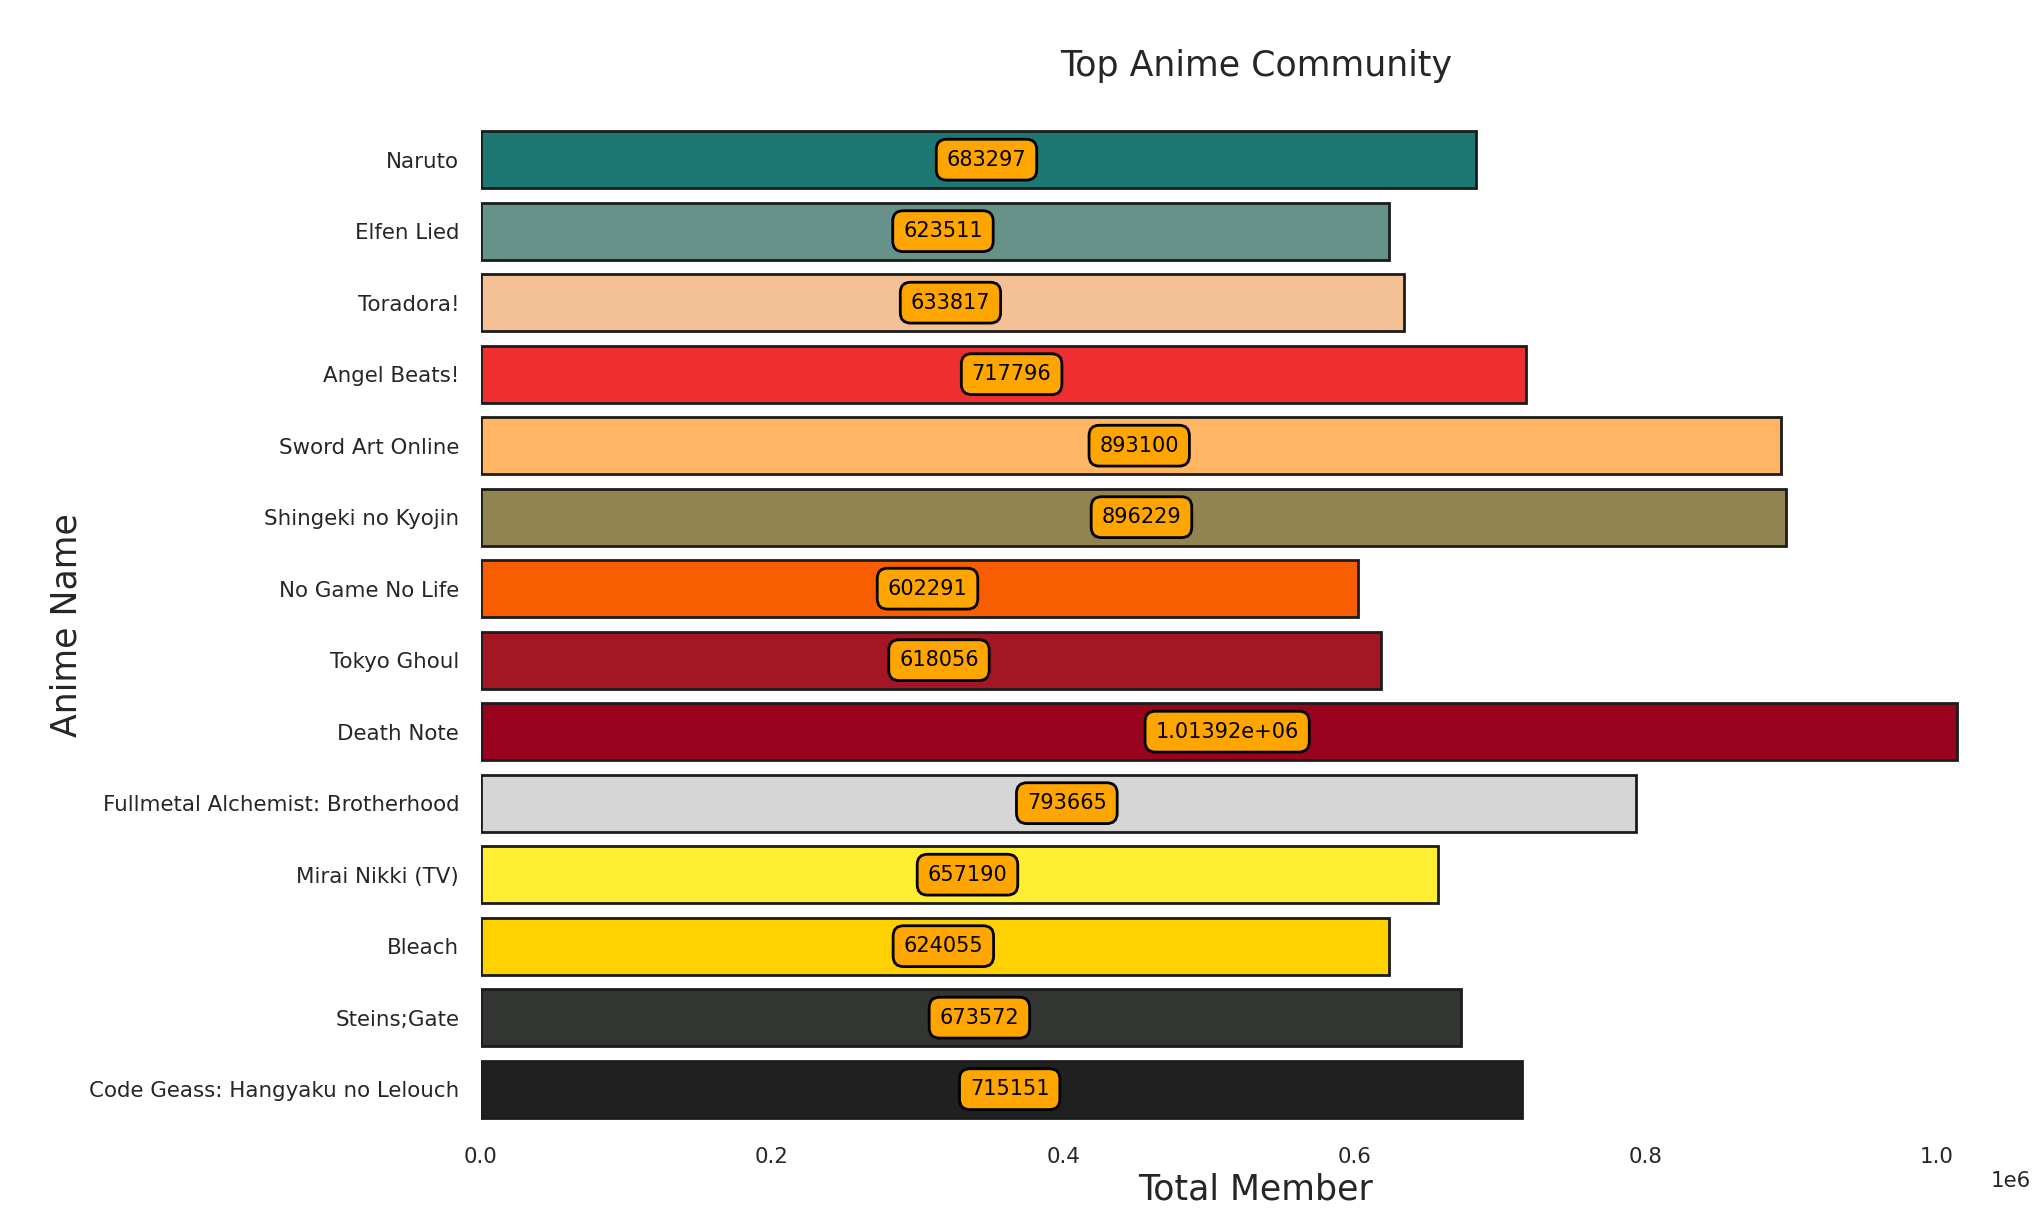

In [ ]:
top_anime = df.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)

plt.subplots(figsize=(20,13))
p = sns.barplot(x=top_anime_temp1["members"],y=top_anime_temp1["name"][:14],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("\nAnime Name" , fontsize = 25)
plt.xlabel("Total Member" , fontsize = 25)
plt.xticks(rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.5, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
print("Anime Categories :")
top_anime_temp1["type"].value_counts().to_frame()

Anime Categories :


,count
type,
TV,3402
OVA,3089
Movie,2112
Special,1581
ONA,526
Music,451


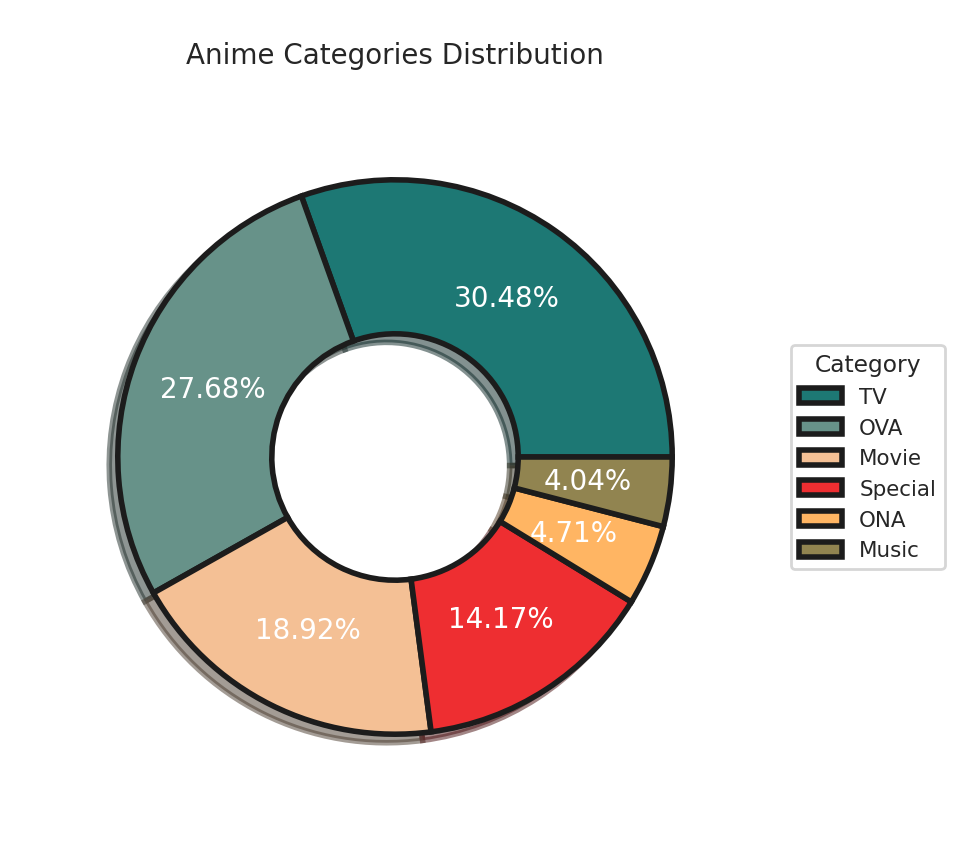

In [ ]:
plt.subplots(figsize=(10, 10))

labels = "TV","OVA","Movie","Special","ONA","Music"
size = 0.5

wedges, texts, autotexts = plt.pie([len(top_anime_temp1[top_anime_temp1["type"]=="TV"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="OVA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Movie"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Special"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="ONA"]["type"]),
                                    len(top_anime_temp1[top_anime_temp1["type"]=="Music"]["type"])],
                                    explode = (0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.7,
                                    radius=.9,
                                    colors = palette,
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "#1c1c1c",
                                    linewidth = 4),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nAnime Categories Distribution",fontsize=20)
plt.show()

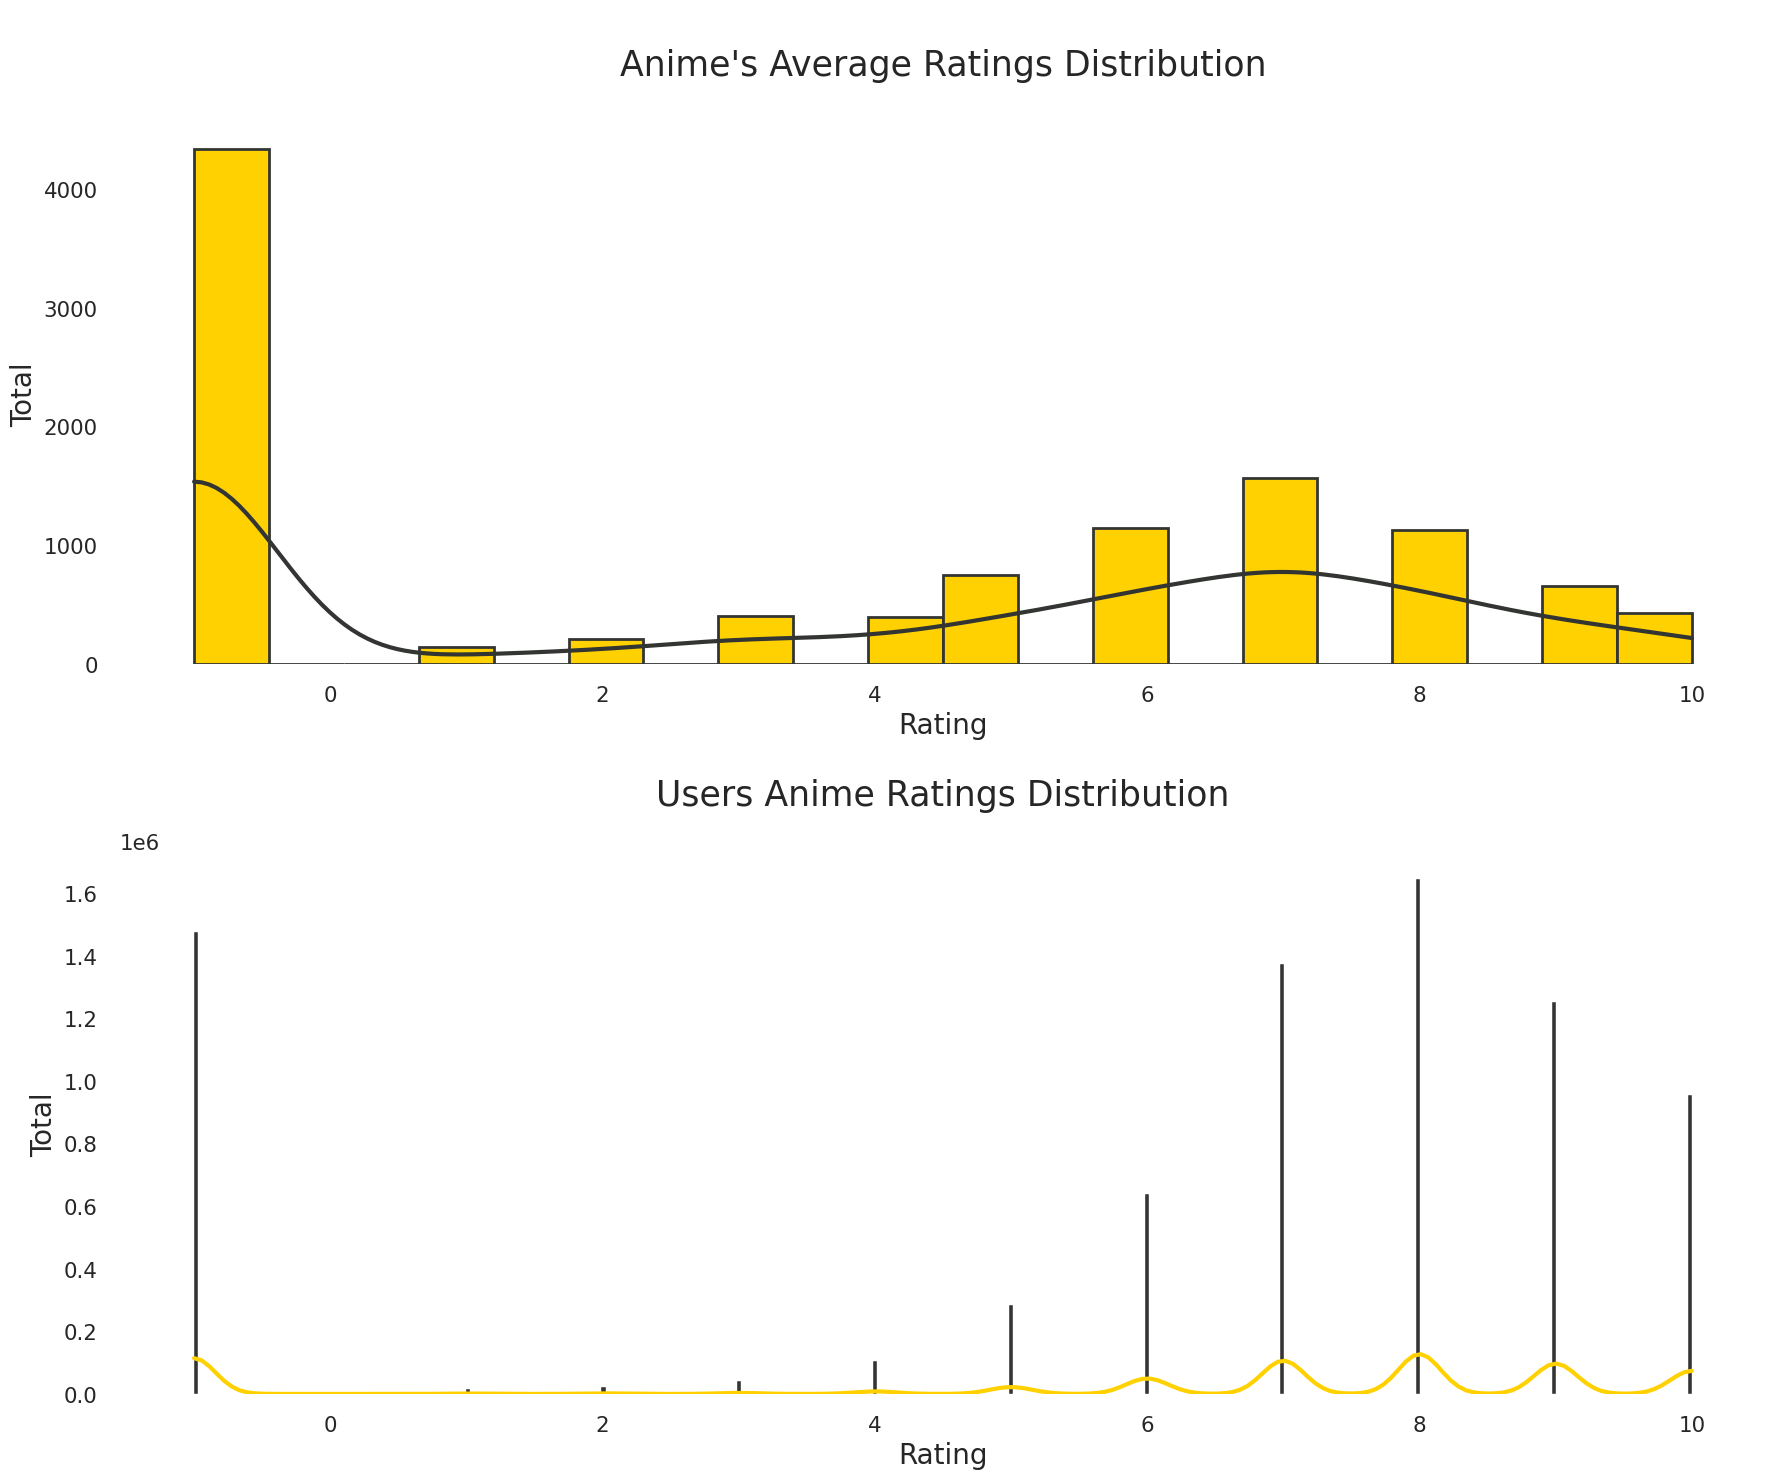

In [ ]:
top_anime_temp2 = top_anime.sort_values(["rating"],ascending=False)

_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_temp2["rating"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 25)
axs[0].set_xlabel("Rating\n", fontsize = 20)
axs[0].set_ylabel("Total", fontsize = 20)

sns.histplot(df["rating"],color=palette[12],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 25)
axs[1].set_xlabel("Rating", fontsize = 20)
axs[1].set_ylabel("Total", fontsize = 20)

sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
def draw_distribution_by_category(category):
    _, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
    plt.tight_layout(pad=4.0)

    sns.histplot(top_anime_temp2[top_anime_temp2["type"]==category]["rating"],color=palette[0],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
    axs[0].lines[0].set_color(palette[11])
    axs[0].set_title(f"\nAnime's Average Ratings Distribution [Category : {category}]\n",fontsize=20)
    axs[0].set_xlabel("Rating")
    axs[0].set_ylabel("Total")

    sns.histplot(df[df["type"]==category]["rating"],color=palette[0],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
    axs[1].lines[0].set_color(palette[11])
    axs[1].set_title(f"\nUsers Anime Ratings Distribution [Category : {category}]\n",fontsize=20)
    axs[1].set_xlabel("Rating")
    axs[1].set_ylabel("Total")

    sns.despine(left=True, bottom=True)
    plt.show()

['TV' 'Movie' 'OVA' 'Special' 'ONA' 'Music']


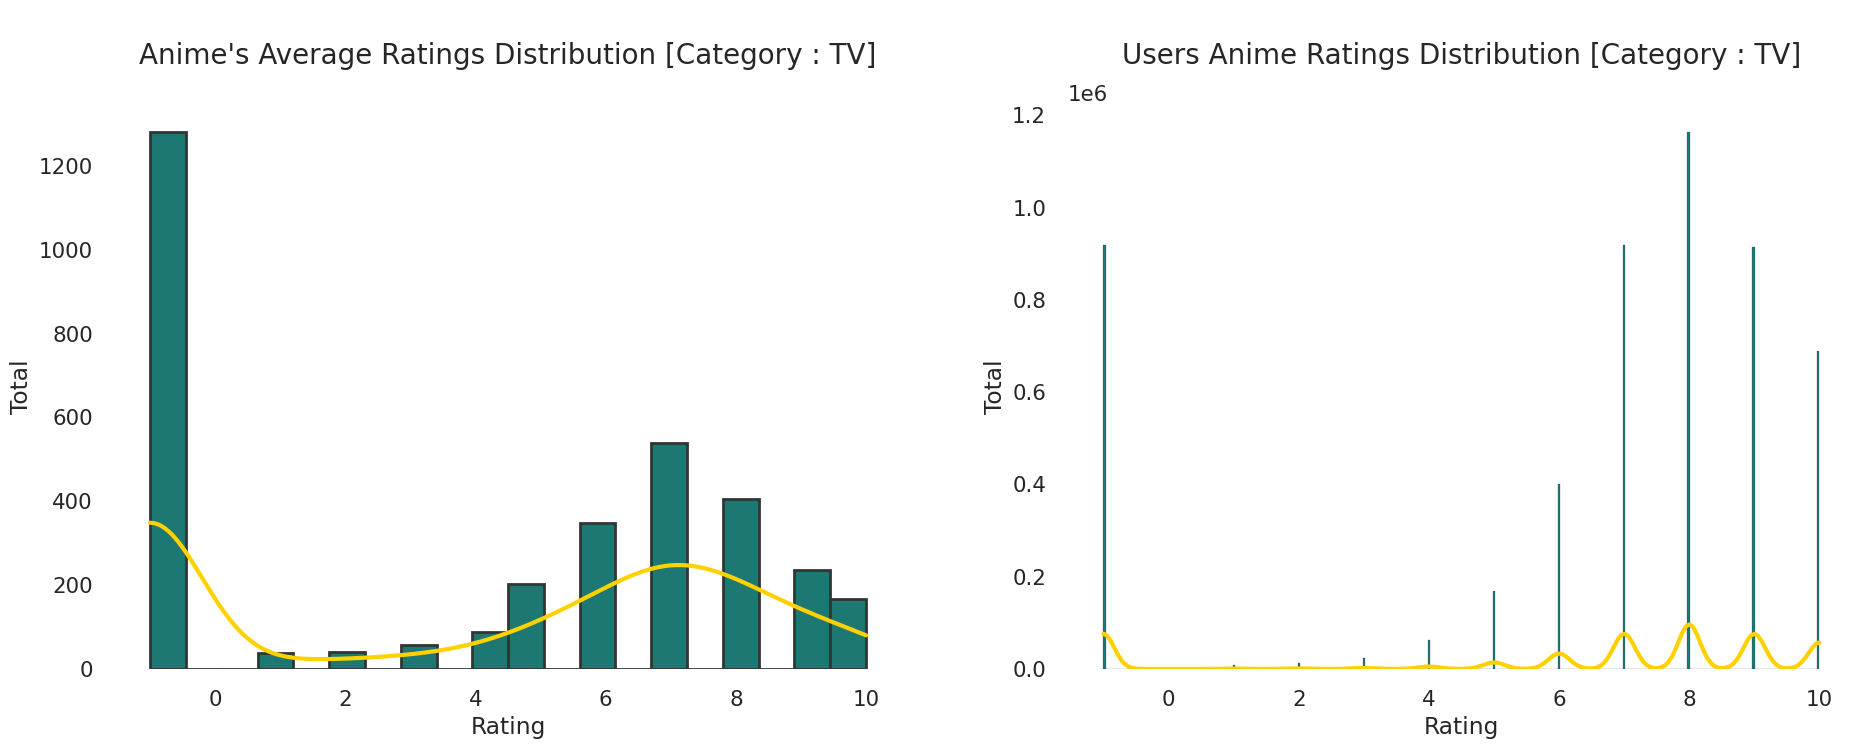

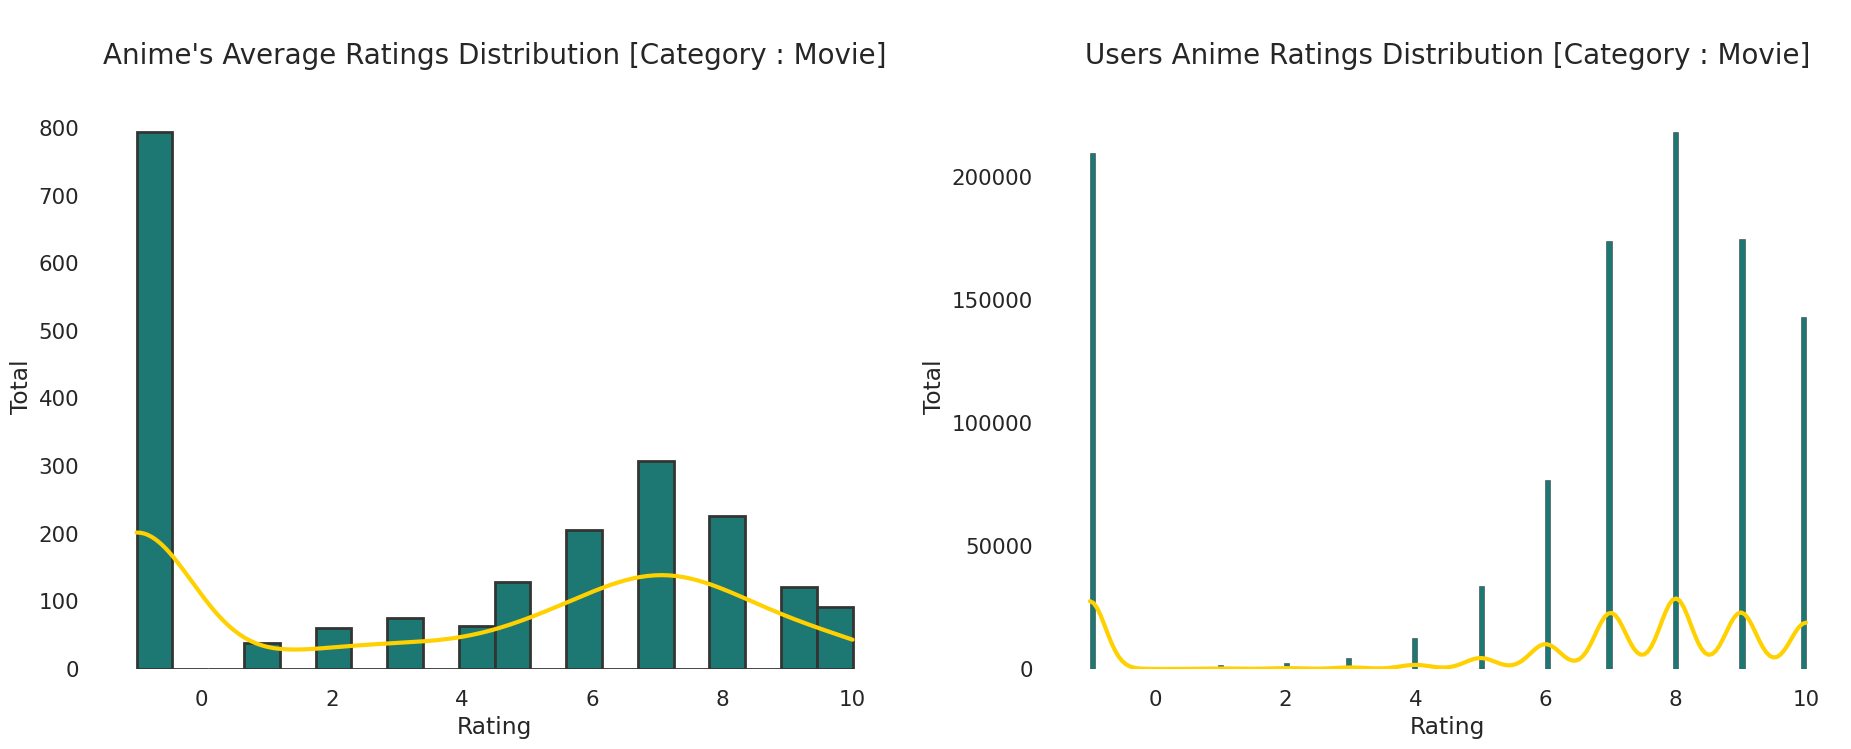

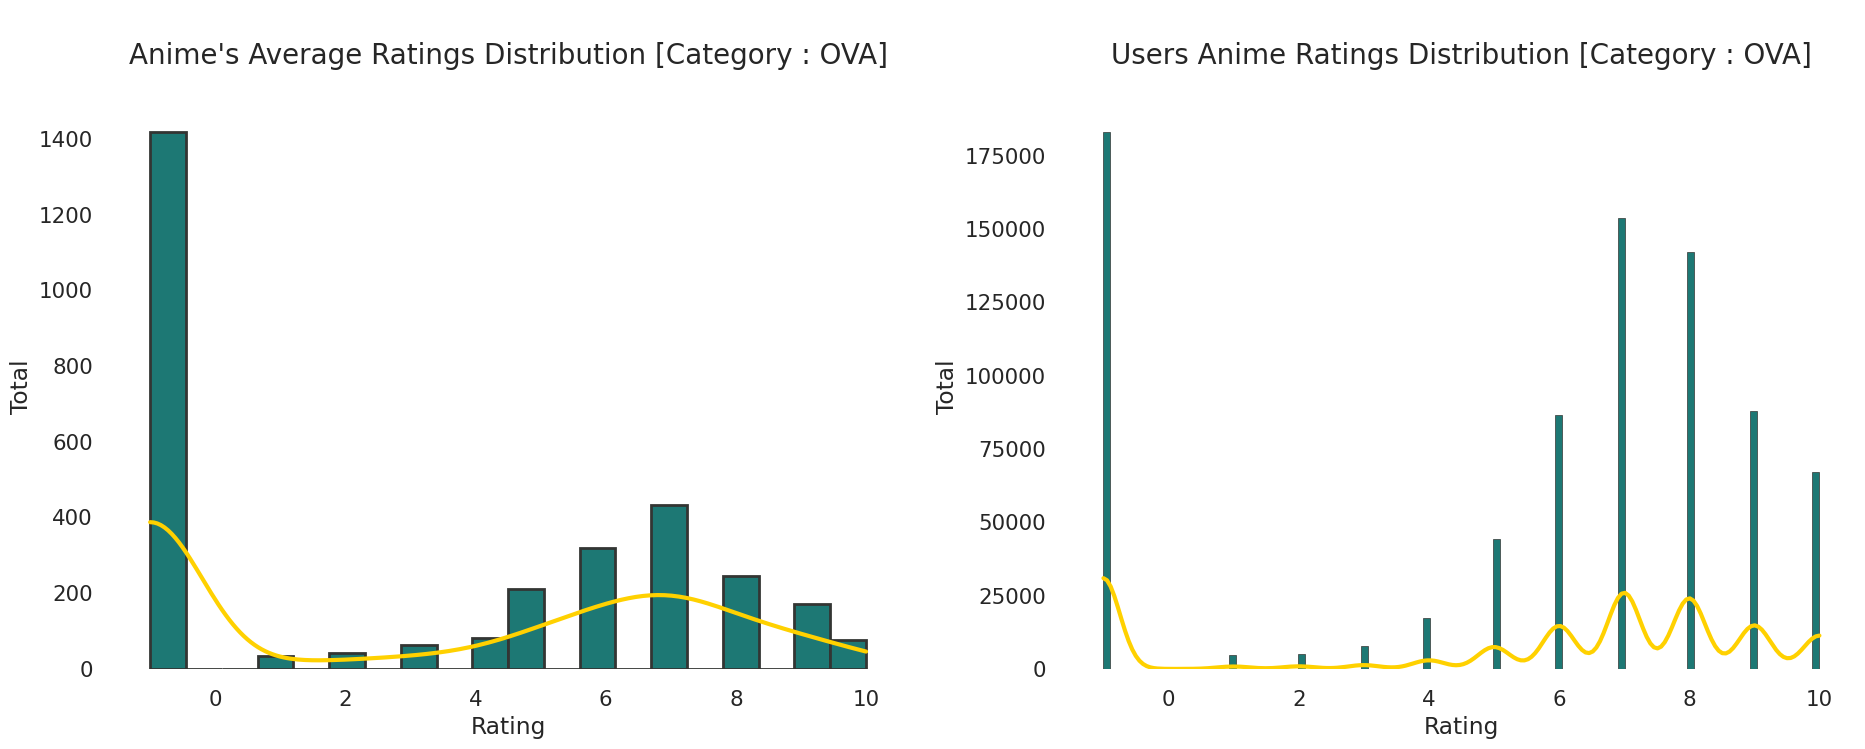

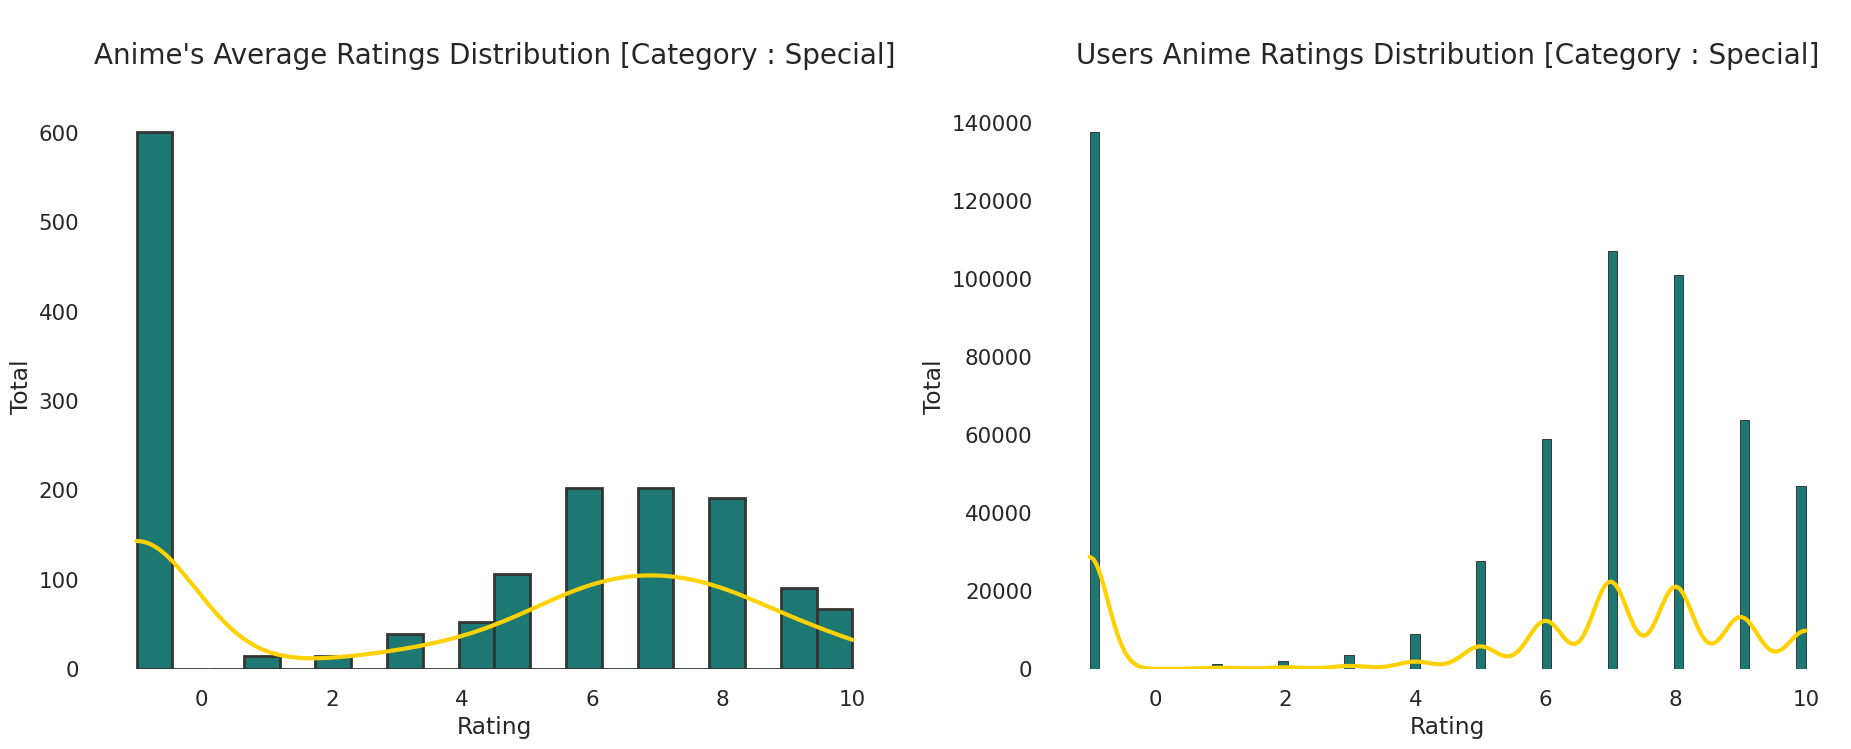

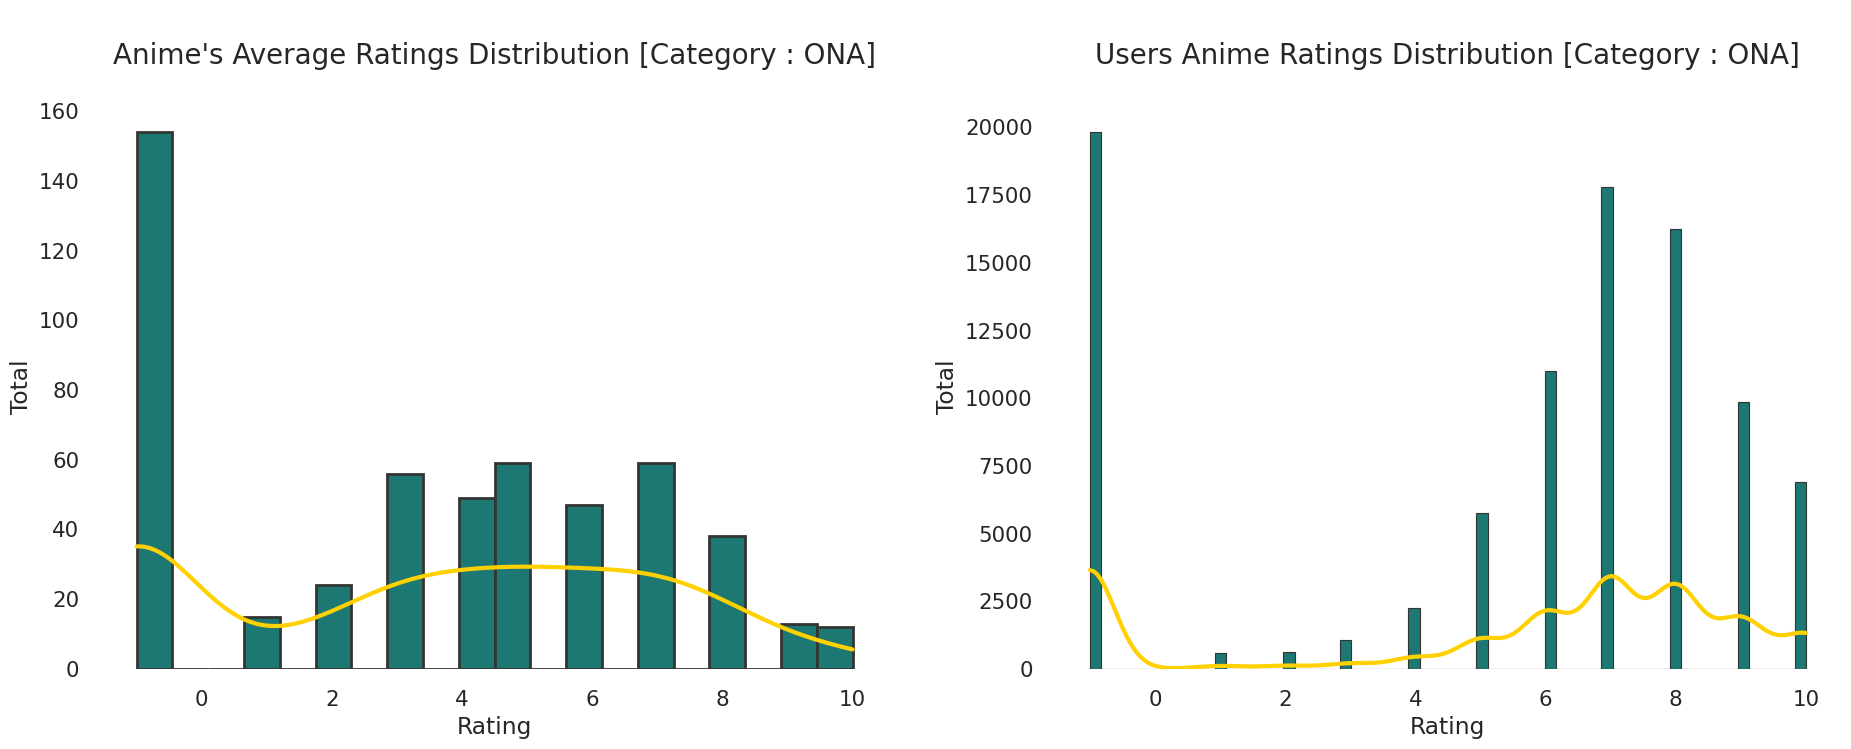

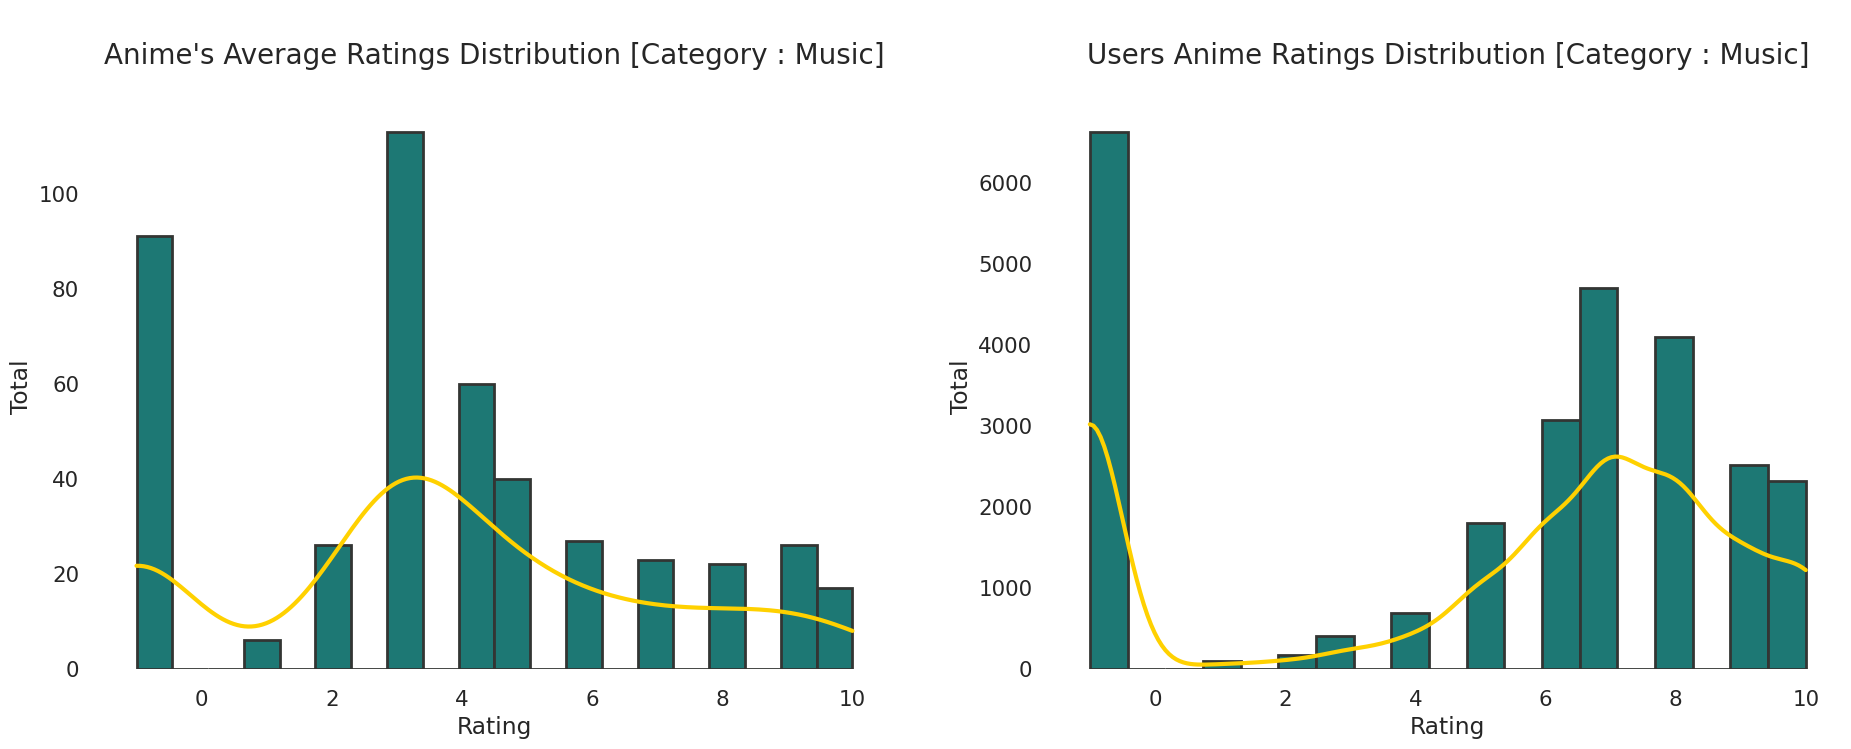

In [ ]:
print(df['type'].unique())
for i in  df['type'].dropna().unique():
    draw_distribution_by_category(i)


## Anime by genre:

In [ ]:
def search_gerne(df_interactions, df_description, feature, verbose=0):
    '''
    Function to search all items that have 'feature' in one column of dataframe
    df_description (column 'gerne' in this case) and search all corresponding
    interactions on df_interactions
    -------------
    Return:
      Dataframe df_result             All interactions whose item has feature
    '''

    # Creation of a item list with gerne = feature
    item_list = [] # anime_list
    for i in range(df_description.shape[0]):
      _ = str(df_description.iloc[i,2])
      if _ != 'nan':
        if feature in _:
            item_list.append(df_description.iloc[i,0])

    if verbose: print('Number of Items - {}: {}'.format(feature, len(item_list)))

    # Search anime found before in df_interactions
    interaction_list = []
    for i in item_list:
        _ = df_interactions[df_interactions['anime_id'] == i].index
        interaction_list.extend(_)

    if verbose: print('Number of Iteractions - {}: {}'.format(feature, len(interaction_list)))

    return df_interactions.loc[interaction_list, :]

In [ ]:
# Creation of a list for all anime genres
gerne_list = []

for i in progress_bar(range(anime_df.shape[0])):
  _ = str(anime_df.iloc[i,2])
  if _ != 'nan':
    _ = anime_df.iloc[i,2].split(', ')
    gerne_list.extend(_)

gerne_list = list(set(gerne_list))

print('Number of genres: ', len(gerne_list))
print('Genres:\n', gerne_list)

Number of genres:  43
Genres:
 ['Psychological', 'Horror', 'Space', 'Seinen', 'Martial Arts', 'Harem', 'Military', 'Fantasy', 'Supernatural', 'Shounen Ai', 'Dementia', 'Shoujo Ai', 'Police', 'Shoujo', 'Comedy', 'Game', 'Kids', 'Hentai', 'Historical', 'Mecha', 'Mystery', 'Action', 'Parody', 'Samurai', 'Josei', 'Romance', 'School', 'Drama', 'Sports', 'Ecchi', 'Yaoi', 'Cars', 'Yuri', 'Vampire', 'Sci-Fi', 'Slice of Life', 'Music', 'Super Power', 'Shounen', 'Demons', 'Thriller', 'Adventure', 'Magic']


In [ ]:
# Count how much intercations we have on df_rating given a genre
gerne_counts = []
for g in progress_bar(gerne_list):
  _ = search_gerne(rating_df, anime_df, g)
  gerne_counts.append(_.shape[0])

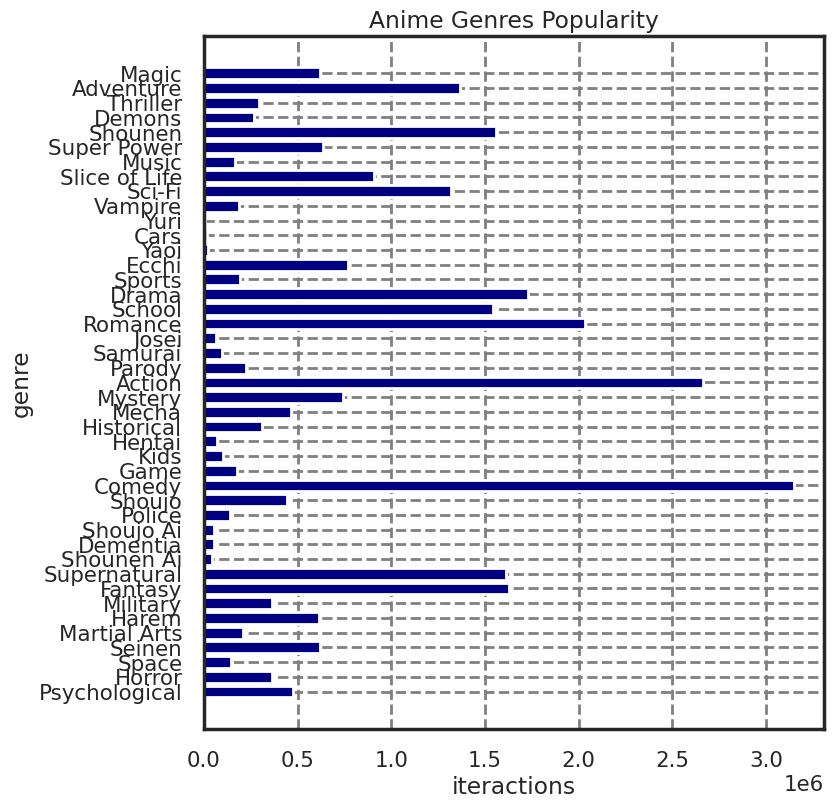

In [ ]:
fig, ax = plt.subplots(figsize=(8,9))

ax.barh(np.arange(len(gerne_list)), gerne_counts, color='navy')

ax.set_yticks(np.arange(len(gerne_list)))
ax.set_yticklabels(gerne_list)
ax.set_title('Anime Genres Popularity')
ax.set_xlabel('iteractions')
ax.set_ylabel('genre')
plt.grid(color='grey', linestyle='--')

#plt.savefig('./figures/anime_genres_popularity.jpg')

plt.show()


## Graph Creation

In [ ]:
import networkx as nx
G = nx.Graph()

In [ ]:
# Add user nodes
for i in progress_bar(rating_df.user_id.unique()):
  G.add_nodes_from([
    ('user_' + str(i), {'node_type':'user'})
  ])

In [ ]:
# Add anime nodes
for i in progress_bar(rating_df.anime_id.unique()):
  name = anime_df[anime_df['anime_id']==i].name.to_string(index=False)[1:]
  genre = anime_df[anime_df['anime_id']==i].genre.to_string(index=False)[1:].split(', ')
  anime_type = anime_df[anime_df['anime_id']==i]['type'].to_string(index=False)[1:]
  episodes = str(anime_df[anime_df['anime_id']==i].episodes.to_string(index=False)[1:]) # because there is also value 'unknown'

  rating = anime_df[anime_df['anime_id']==i].rating.to_string(index=False)
  if rating != 'NaN':
    rating = float(rating[1:])
  else:
    rating = 0.0

  members = int(anime_df[anime_df['anime_id']==i].members.to_string(index=False)[1:])


  G.add_nodes_from([
    ('anime_' + str(i), {'node_type':'anime',
                         'name':name,
                         'genre':genre,
                         'type':anime_type,
                         'episodes':episodes,
                         'rating':rating,
                         'members':members})
  ])

In [ ]:
# Add user-item iteractions -> Edges
for i in progress_bar(range(rating_df.shape[0])):
  user = 'user_' + str(rating_df.iloc[i,0])
  anime = 'anime_' + str(rating_df.iloc[i,1])
  rating = rating_df.iloc[i,2]

  G.add_edges_from([(user, anime, {'weight':rating})])

In [ ]:
nx.readwrite.edgelist.write_weighted_edgelist(G, '/graph.edgelist')

In [ ]:
rating_df

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


Text(0.5, 1.0, 'Some user_item iteractions')

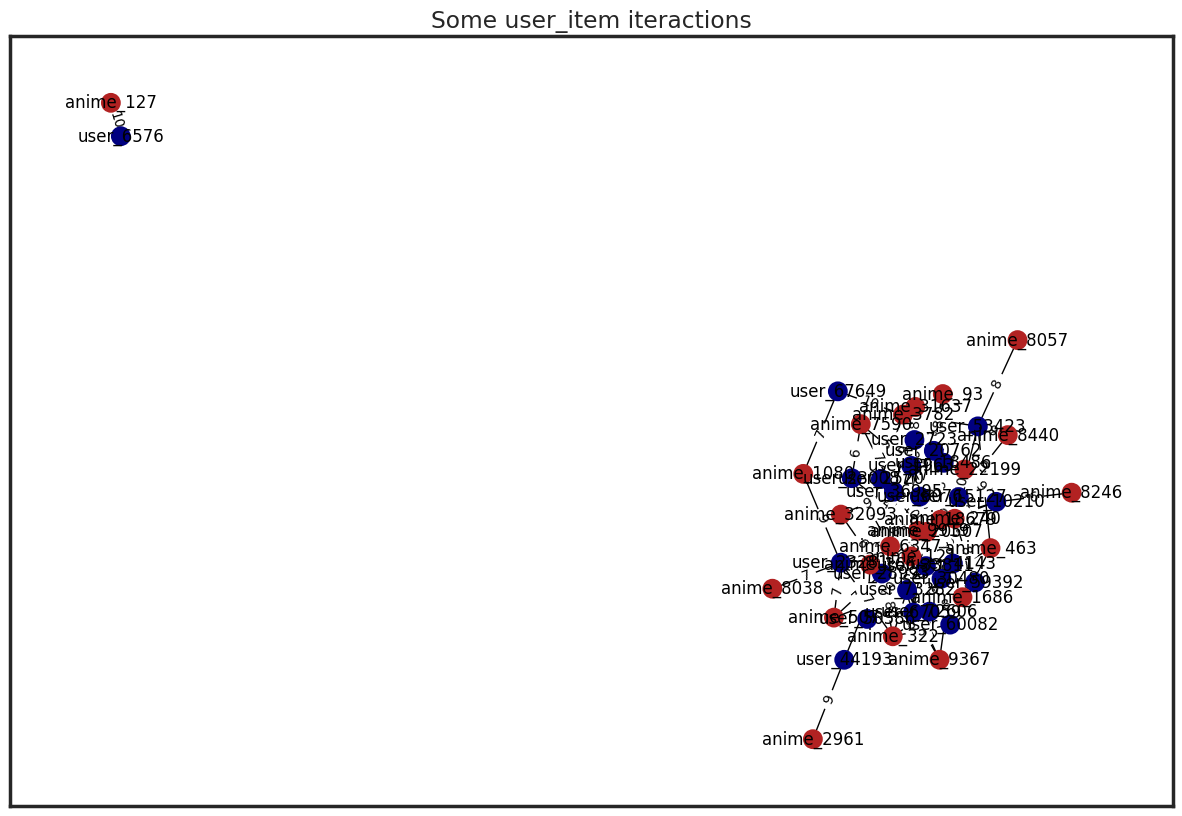

In [ ]:
# ----------------- Creation of a subgraph ---------------------
import random
random.seed = 1
k = 25
ids = random.choices(range(rating_df.shape[0]), k=k)
nodes = []
_ = ['user_'+str(id) for id in rating_df.iloc[ids, :].user_id.unique().tolist()]
num_users = len(_)
nodes.extend(_)
_ = ['anime_'+str(id) for id in rating_df.iloc[ids, :].anime_id.unique().tolist()]
num_items = len(_)
nodes.extend(_)

subG = G.subgraph(nodes)

# ----------------- Plot ----------------------------------------
fig, ax = plt.subplots(figsize=(15,10))

colors = ['navy' if t == 'user' else 'firebrick' for t in nx.get_node_attributes(subG,'node_type').values()]
pos=nx.spring_layout(subG, seed=1)
nx.drawing.nx_pylab.draw_networkx(subG,pos, node_color=colors, node_size=150)

labels = nx.get_edge_attributes(subG,'weight')
nx.draw_networkx_edge_labels(subG,pos,edge_labels=labels)
ax.set_title('Some user_item iteractions')

## GNN


In [ ]:
# Packages
import numpy as np
import pandas as pd
from zipfile import ZipFile
import networkx as nx
from fastprogress import master_bar, progress_bar
from networkx.algorithms import centrality
import tensorflow as tf

from sklearn import preprocessing, feature_extraction, model_selection
from sklearn.metrics import mean_absolute_error, mean_squared_error

import multiprocessing
from collections import defaultdict
#import random as rd
#rd.seed(1)
import matplotlib.pyplot as plt
import seaborn as sns
#from stellargraph import StellarGraph
#import stellargraph as sg
#from stellargraph.mapper import HinSAGELinkGenerator
#from stellargraph.layer import HinSAGE, link_regression
#from tensorflow.keras import Model, optimizers, losses, metrics, layers, regularizers

In [ ]:
import sys
if 'google.colab' in sys.modules:
  !pip install -q stellargraph[demos]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.4 MB/s eta 0:00:00


In [ ]:
!pip install git+https://github.com/VenkateshwaranB/stellargraph.git

  Cloning https://github.com/VenkateshwaranB/stellargraph.git to /tmp/pip-req-build-so8zd3t1
  Running command git clone --filter=blob:none --quiet https://github.com/VenkateshwaranB/stellargraph.git /tmp/pip-req-build-so8zd3t1
  Resolved https://github.com/VenkateshwaranB/stellargraph.git to commit efa1f847109a4ba490e7a5105646a20ee09a3243
  Preparing metadata (setup.py) ... done


In [ ]:
from stellargraph import StellarGraph
import stellargraph as sg


In [ ]:
from stellargraph.mapper import HinSAGELinkGenerator
from stellargraph.layer import HinSAGE, link_regression
from tensorflow.keras import Model, optimizers, losses, metrics, layers, regularizers

In [ ]:
# Add user node type
for i in rating_df.user_id.unique():
  attrs = {'user_' + str(i): {'node_type':'user'}}
  nx.set_node_attributes(G, attrs)

# Add anime node type
for i in rating_df.anime_id.unique():
  attrs = {'anime_' + str(i): {'node_type':'anime'}}
  nx.set_node_attributes(G, attrs)


In [ ]:
# k = nodes sample out of the total amount
# otherwise the gnn training requires too much time
k = 5000
# k = 15000 moi chuan
batch_size = 200
epochs = 30

train_size = 0.7
val_size = 0.25
test_size = 0.3

# Network parameters
num_samples = [8, 4] # number of layers/iterations in the HinSAGE model
dropout = 0.0
hinsage_layer_sizes = [32, 16]

SAVE = True
seed = 11

In [ ]:
#np.random.seed(11)
np.random.seed(11)
k_nodes = random.sample(list(G.nodes()), k=k)
subG = G.subgraph(k_nodes)

userList = [n for n,d in subG.nodes(data=True) if d['node_type'] == 'user']
animeList = [n for n,d in subG.nodes(data=True) if d['node_type'] == 'anime']

num_users = len(set(userList))
num_items = len(set(animeList))

print('Number of users: ', num_users)
print('Number of animes: ', num_items)
print()
print('[Info] Number of NODES: ', num_users + num_items)
print('[Info] Number of EDGES: ', len(subG.edges()))

Number of users:  4403
Number of animes:  597

[Info] Number of NODES:  5000
[Info] Number of EDGES:  25717


In [ ]:
data_user = defaultdict()
data_anime = defaultdict()


# --------- Users features ------------
# -------------------------------------
for i in userList:
  avg_rating = np.mean([e[2]['weight'] for e in G.edges(i, data=True)])
  data_user[i] = avg_rating

user_features = pd.DataFrame.from_dict(data_user, orient='index', columns=['avg_rating'])


# --------- Anime features ------------
# -------------------------------------
for i in animeList:
  # RATING
  code = round(float(i[6:]))
  rating = anime_df[anime_df['anime_id']==code].rating.to_string(index=False)
  if rating != 'NaN':
    rating = float(rating[1:])
  else:
    rating = 0.0
  # MEMBERS
  members = int(anime_df[anime_df['anime_id']==code].members.to_string(index=False)[1:])

  # FEATURES
  data_anime[i] = [rating, members]


anime_features = pd.DataFrame.from_dict(data_anime, orient='index', columns=['rating', 'members'])


In [ ]:
user_features.head()

,avg_rating
user_71676,8.043478
user_65202,10.000000
user_63405,9.500000
user_21863,7.838174
user_39293,7.666667


In [ ]:
anime_features.head()

,rating,members
anime_6266,0.81,74
anime_1622,0.73,712
anime_891,0.03,7194
anime_258,0.43,574
anime_2030,0.32,1874


In [ ]:
g = StellarGraph.from_networkx(subG, node_type_attr='node_type', edge_weight_attr='weight', edge_type_default='rating',
                               node_features={'user': user_features, 'anime': anime_features})
print(g.info())

StellarGraph: Undirected multigraph
 Nodes: 5000, Edges: 25717

 Node types:
  user: [4403]
    Features: float32 vector, length 1
    Edge types: user-rating->anime
  anime: [597]
    Features: float32 vector, length 2
    Edge types: anime-rating->user

 Edge types:
    anime-rating->user: [25717]
        Weights: range=[1, 10], mean=7.8795, std=1.57958
        Features: none


# Link prediction

The recommender system is treated as a link prediction problem. In specific the node and edge embeddings are created thanks HinSAGE algorithm of StellarGraph library. It's a modified version of GraphSAGE for heterogeneous graphs.

In general the main concept is that the embeddings are created thanks the information given by a neighborhood of nodes (bellow there is a simple image taken from official documentation of GraphSAGE).

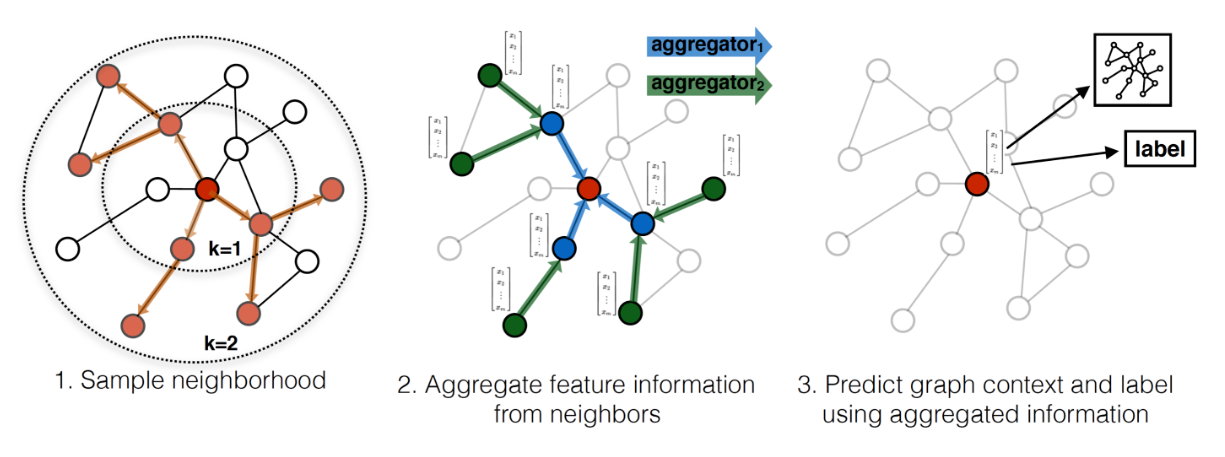

In [ ]:
users = []
anime = []
rating = []
for e in list(subG.edges(data=True)):
  n1 = e[0]
  n2 = e[1]
  if n1[:5] == 'anime':
    a = n1
    u = n2
  else:
    a = n2
    u = n1

  r = e[2]['weight']

  users.append(u)
  anime.append(a)
  rating.append(r)

E = pd.DataFrame({'user_id':users, 'anime_id':anime, 'rating':rating})

In [ ]:
E.head()

,user_id,anime_id,rating
0,user_71676,anime_5114,10
1,user_71676,anime_6880,8
2,user_71676,anime_22199,7
3,user_71676,anime_27631,9
4,user_71676,anime_27899,10


**Train, validation and test sets**

In [ ]:
edges_train_val, edges_test = model_selection.train_test_split(
    E, train_size=train_size, test_size=test_size, random_state=seed
)

edges_train, edges_val = model_selection.train_test_split(
    edges_train_val, test_size=val_size, random_state=seed
)

In [ ]:
edgelist_train = edges_train.iloc[:, :2].to_numpy()
edgelist_val = edges_val.iloc[:, :2].to_numpy()
edgelist_test = edges_test.iloc[:, :2].to_numpy()

labels_train = edges_train['rating'].to_numpy()
labels_val= edges_val['rating'].to_numpy()
labels_test = edges_test['rating'].to_numpy()

In [ ]:
print(edges_test.iloc[:, :2].to_numpy())
print(labels_test)
print(labels_train)

[['user_6448' 'anime_877']
 ['user_6075' 'anime_6880']
 ['user_66847' 'anime_5114']
 ...
 ['user_6592' 'anime_1']
 ['user_5204' 'anime_891']
 ['user_12140' 'anime_7724']]
[10  5  9 ...  9  5  9]
[10  8  9 ...  7  7  8]


In [ ]:
print(edgelist_test)

[['user_6448' 'anime_877']
 ['user_6075' 'anime_6880']
 ['user_66847' 'anime_5114']
 ...
 ['user_6592' 'anime_1']
 ['user_5204' 'anime_891']
 ['user_12140' 'anime_7724']]


In [ ]:
#little check
num_edges = len(edgelist_train) + len(edgelist_val) + len(edgelist_test)
print('Tot num of edges: ', num_edges)
print('Edges in the graph: ', len(E))

Tot num of edges:  25717
Edges in the graph:  25717


**Embeddings generation**

In [ ]:
generator = HinSAGELinkGenerator(
    g, batch_size, num_samples, head_node_types=["user", "anime"]
)
train_gen = generator.flow(edgelist_train, labels_train, shuffle=True)
val_gen = generator.flow(edgelist_val, labels_val)

In [ ]:
test_gen = generator.flow(edgelist_test,labels_test)

In [ ]:
print(test_gen)

**Embeddings aggregation**

In [ ]:
assert len(hinsage_layer_sizes) == len(num_samples)

hinsage = HinSAGE(
    layer_sizes=hinsage_layer_sizes, generator=generator, bias=True, dropout=dropout
)

In [ ]:
# Expose input and output sockets of hinsage:
x_inp, x_out = hinsage.in_out_tensors()

**Embeddings combination**

In [ ]:
# Link regression layer to combine node-edge embeddings
output_dim = 1 # default = 1, others = 10
score_prediction = link_regression(output_dim=output_dim, edge_embedding_method="concat")(x_out)

link_regression: using 'concat' method to combine node embeddings into edge embeddings


**MLP and final model**

In [ ]:
# Addtional MLP layers
#l1 = layers.Dense(1, activation='relu', kernel_regularizer=regularizers.l1(0.001))(score_prediction)
# Model creation
model = Model(inputs=x_inp, outputs=score_prediction)
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-2),
    loss=losses.mean_squared_error,
    metrics=[metrics.RootMeanSquaredError(), metrics.mae],
)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 8, 2)]               0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 32, 1)]              0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 32, 2)]              0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 1, 1)]               0         []                            
                                                                                              

In [ ]:
# Specify the number of workers to use for model training
num_workers = 4

In [ ]:
y_pred_fresh = model.predict(test_gen)

test_metrics = model.evaluate(
    test_gen, verbose=1, use_multiprocessing=False, workers=num_workers
)

print("Untrained model's Test Evaluation:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

39/39 [==============================] - 3s 49ms/step - loss: 67.7276 - root_mean_squared_error: 8.2297 - mean_absolute_error: 8.0708
Untrained model's Test Evaluation:
	loss: 67.7276
	root_mean_squared_error: 8.2297
	mean_absolute_error: 8.0708


**Train**

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss', restore_best_weights=True)]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    verbose=1,
    shuffle=False,
    use_multiprocessing=False,
    workers=num_workers,
)

Epoch 1/30
68/68 [==============================] - 13s 155ms/step - loss: 21.9164 - root_mean_squared_error: 4.6815 - mean_absolute_error: 4.2081 - val_loss: 5.9714 - val_root_mean_squared_error: 2.4436 - val_mean_absolute_error: 2.1271
Epoch 2/30
68/68 [==============================] - 11s 165ms/step - loss: 3.3440 - root_mean_squared_error: 1.8287 - mean_absolute_error: 1.4817 - val_loss: 2.3388 - val_root_mean_squared_error: 1.5293 - val_mean_absolute_error: 1.2091
Epoch 3/30
68/68 [==============================] - 11s 153ms/step - loss: 2.4081 - root_mean_squared_error: 1.5518 - mean_absolute_error: 1.2196 - val_loss: 2.2929 - val_root_mean_squared_error: 1.5142 - val_mean_absolute_error: 1.2002
Epoch 4/30
68/68 [==============================] - 10s 149ms/step - loss: 2.3900 - root_mean_squared_error: 1.5460 - mean_absolute_error: 1.2158 - val_loss: 2.2943 - val_root_mean_squared_error: 1.5147 - val_mean_absolute_error: 1.2017
Epoch 5/30
68/68 [==============================] -

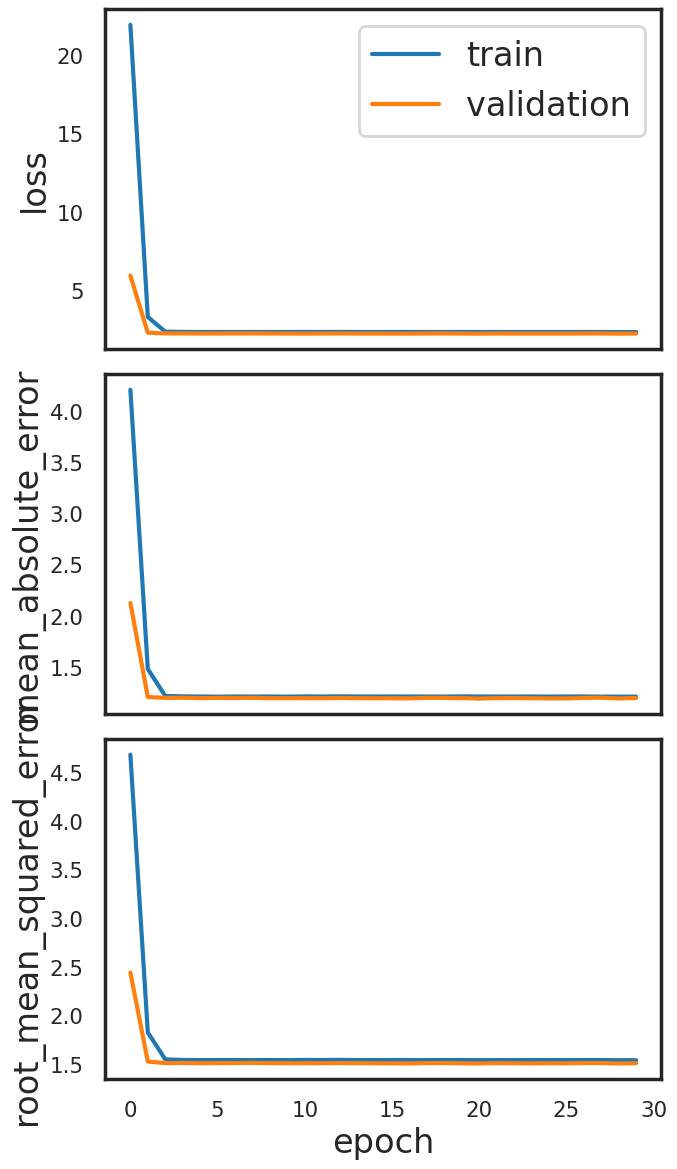

In [ ]:
sg.utils.plot_history(history)

**Final results**

In [ ]:
y_true = labels_test
# Predict the rankings using the model:
y_pred = model.predict(test_gen)
# Mean baseline rankings = mean movie ranking:
y_pred_baseline = np.full_like(y_pred, np.mean(y_true))

rmse = np.sqrt(mean_squared_error(y_true, y_pred_baseline))
mae = mean_absolute_error(y_true, y_pred_baseline)
print("Mean Baseline Test set metrics:")
print("\troot_mean_square_error = ", rmse)
print("\tmean_absolute_error = ", mae)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
print("\nModel Test set metrics:")
print("\troot_mean_square_error = ", rmse)
print("\tmean_absolute_error = ", mae)

39/39 [==============================] - 2s 52ms/step
Mean Baseline Test set metrics:
	root_mean_square_error =  1.5797176200571608
	mean_absolute_error =  1.2184720778477631

Model Test set metrics:
	root_mean_square_error =  1.5392039732657548
	mean_absolute_error =  1.2111833881627345


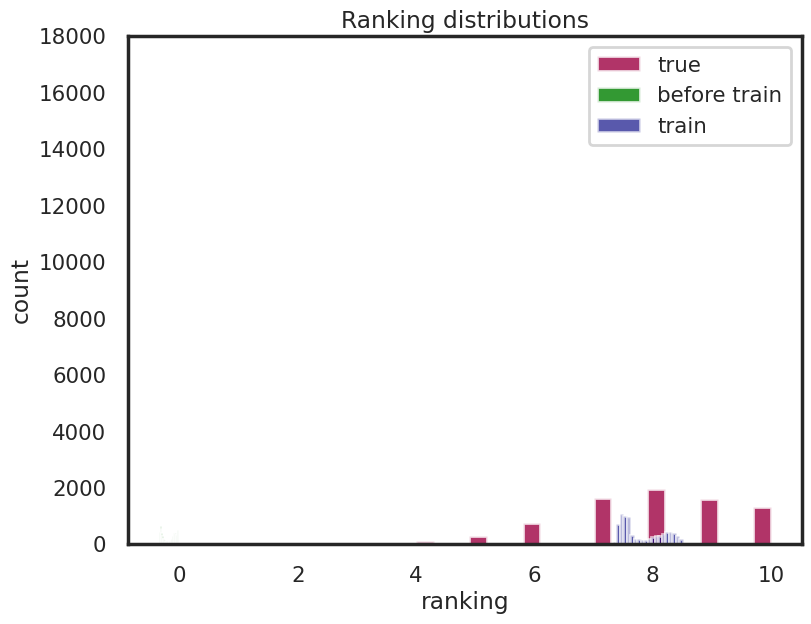

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

num_color = 3
col = [plt.cm.Spectral(i/float(num_color-1)) for i in range(num_color)]

ax.hist(y_true, bins=30, facecolor=col[0], alpha=0.8, label='true')
ax.hist(y_pred_fresh, bins=30, facecolor='green', alpha=0.8, label='before train')
ax.hist(y_pred, bins=30, facecolor='navy', alpha=0.65, label='train')

fig.tight_layout()

plt.ylim(top=18000)

plt.title('Ranking distributions')
plt.xlabel("ranking")
plt.ylabel("count")
plt.legend()

if SAVE: plt.savefig('./ranking_distributions.jpg', bbox_inches = 'tight')
plt.show()

**Recommendation**

In [ ]:
#rd.seed(seed)
np.random.seed(seed)
user = rd.choice(userList)
#user = "user_3"
num_top = 10
d = 4        # maximum search depth

# ---------------------------------------------
# ------------- candidate edges ---------------
#
# An oriented tree constructed from of a breadth-first-search starting at source
edges = []
#node_attributes = nx.get_node_attributes(subG, 'node_type')
node_attributes = nx.get_node_attributes(G, 'node_type')
#for u in list(nx.algorithms.traversal.breadth_first_search.bfs_tree(subG, user, depth_limit=d).nodes()):
for u in list(nx.algorithms.traversal.breadth_first_search.bfs_tree(G, user, depth_limit=d).nodes()):
  if node_attributes[u] == 'anime':
    edges.append((user, u))

print(len(edges))

9891


In [ ]:
node_attributes = nx.get_node_attributes(G, 'node_type')
print(node_attributes)

{'user_1': 'user', 'user_2': 'user', 'user_3': 'user', 'user_5': 'user', 'user_7': 'user', 'user_8': 'user', 'user_9': 'user', 'user_10': 'user', 'user_11': 'user', 'user_12': 'user', 'user_14': 'user', 'user_15': 'user', 'user_16': 'user', 'user_17': 'user', 'user_18': 'user', 'user_19': 'user', 'user_20': 'user', 'user_21': 'user', 'user_22': 'user', 'user_23': 'user', 'user_24': 'user', 'user_25': 'user', 'user_26': 'user', 'user_27': 'user', 'user_28': 'user', 'user_29': 'user', 'user_30': 'user', 'user_31': 'user', 'user_32': 'user', 'user_33': 'user', 'user_34': 'user', 'user_35': 'user', 'user_36': 'user', 'user_37': 'user', 'user_38': 'user', 'user_39': 'user', 'user_40': 'user', 'user_41': 'user', 'user_42': 'user', 'user_43': 'user', 'user_44': 'user', 'user_45': 'user', 'user_46': 'user', 'user_47': 'user', 'user_48': 'user', 'user_50': 'user', 'user_51': 'user', 'user_52': 'user', 'user_53': 'user', 'user_55': 'user', 'user_56': 'user', 'user_57': 'user', 'user_58': 'user',

In [ ]:
print(test_gen)
print(labels_test)
#user_gen = generator.flow(edges)
#user_gen

[10  5  9 ...  9  5  9]


In [ ]:
user_gen = generator.flow(edgelist_test,labels_test)

In [ ]:
user_pred1 = model.predict(user_gen)

39/39 [==============================] - 2s 52ms/step


In [ ]:
#user_pred = model.predict(test_gen).ravel()
user_pred = model.predict(user_gen).ravel()

39/39 [==============================] - 2s 48ms/step


In [ ]:
print(len(user_pred))
print(len(edges))

7716
9891


In [ ]:
# filtering all rates that don't reach a certain threshold
th = 6
user_pred = [r for r in user_pred if r >= th]
if len(user_pred) < len(edges):
  edges = [edges[i] for i in range(len(user_pred)) if user_pred[i] >= th]
else:
  edges = [edges[i] for i in range(len(edges)) if user_pred[i] >= th]
temp_user_pred = []
temp_edges = []

# filtering all suggestions already watched
for i in range(len(edges)):
  #for a in subG.neighbors(user):
  for a in G.neighbors(user):
    if a != edges[i][1]:
      temp_user_pred.append(user_pred[i])
      temp_edges.append(edges[i])

user_pred = list(set(temp_user_pred))
edges = list(set(temp_edges))
del temp_user_pred
del temp_edges
# final suggestions
suggestions = np.flip(np.argsort(user_pred))[:num_top]


for s in suggestions:
  anime_id = edges[s][1][6:]
  #i = anime_df[anime_df['anime_id']==int(anime_id)].index[0]
  i = anime_df[anime_df['anime_id']==float(anime_id)].index[0]
  name = anime_df.at[i, 'name']
  # add some spaces to have better visualitazion
  for j in range(50 - len(name)):
    name += ' '
  print('{} {}'.format(name, user_pred[s]))


Sekai Seifuku: Bouryaku no Zvezda - Shin Zvezda Daisakusen 8.506617546081543
Wolf Daddy                                         8.506545066833496
D.C.III: Da Capo III Special                       8.506255149841309
Anime Tenchou Movie                                8.506155014038086
Yume no Ukiyo ni Saitemina                         8.505195617675781
Nana to Kaoru                                      8.504961013793945
Durarara!!x2 Ten: Onoroke Chakapoko                8.503222465515137
Okusama wa Joshikousei                             8.503056526184082
Gasaraki                                           8.502716064453125
Robo to Shoujo (Kari)                              8.502710342407227


In [ ]:
#for u in list(subG[user]):
for u in list(G[user]):
  anime_id = u[6:]
  #i = anime_df[anime_df['anime_id']==int(anime_id)].index[0]
  i = anime_df[anime_df['anime_id']==float(anime_id)].index[0]
  name = anime_df.at[i, 'name']
  print(name)

Cowboy Bebop
Cowboy Bebop: Tengoku no Tobira
Monster
Neon Genesis Evangelion
Neon Genesis Evangelion: The End of Evangelion
Fullmetal Alchemist
Mononoke Hime
Sen to Chihiro no Kamikakushi
Samurai Champloo
FLCL
Serial Experiments Lain
Hametsu no Mars
Fullmetal Alchemist: The Conqueror of Shamballa
Howl no Ugoku Shiro
Tonari no Totoro
Nekojiru-sou
Interstella5555: The 5tory of The 5ecret 5tar 5ystem
Riding Bean
Dead Leaves
Kanojo to Kanojo no Neko
Eikyuu Kazoku
Death Note
Code Geass: Hangyaku no Lelouch
Katekyo Hitman Reborn!
Clannad Movie
Onkyo Seimeitai Noiseman
Trava: Fist Planet
Tengen Toppa Gurren Lagann
Darker than Black: Kuro no Keiyakusha
Tekkon Kinkreet
Clannad
Tooi Sekai
Toki wo Kakeru Shoujo
Stranger: Mukou Hadan
Digimon Savers the Movie: Kyuukyoku Power! Burst Mode Hatsudou!!
Code Geass: Hangyaku no Lelouch R2
Cencoroll
Soul Eater
Detroit Metal City
Clannad: Mou Hitotsu no Sekai, Tomoyo-hen
Tengen Toppa Gurren Lagann Movie: Gurren-hen
Clannad: After Story
Tengen Toppa Gurren 

In [ ]:
np.random.seed(seed)
#user = rd.choice(userList)
user = "user_3"
num_top = 10
d = 4        # maximum search depth

edges = []
node_attributes = nx.get_node_attributes(G, 'node_type')
for u in list(nx.algorithms.traversal.breadth_first_search.bfs_tree(G, user, depth_limit=d).nodes()):
  if node_attributes[u] == 'anime':
    edges.append((user, u))
node_attributes = nx.get_node_attributes(G, 'node_type')
user_gen = generator.flow(edgelist_test,labels_test)
user_pred1 = model.predict(user_gen)
user_pred = model.predict(user_gen).ravel()
# filtering all rates that don't reach a certain threshold
th = 6
user_pred = [r for r in user_pred if r >= th]
if len(user_pred) < len(edges):
  edges = [edges[i] for i in range(len(user_pred)) if user_pred[i] >= th]
else:
  edges = [edges[i] for i in range(len(edges)) if user_pred[i] >= th]
temp_user_pred = []
temp_edges = []

# filtering all suggestions already watched
for i in range(len(edges)):
  #for a in subG.neighbors(user):
  for a in G.neighbors(user):
    if a != edges[i][1]:
      temp_user_pred.append(user_pred[i])
      temp_edges.append(edges[i])

user_pred = list(set(temp_user_pred))
edges = list(set(temp_edges))
del temp_user_pred
del temp_edges
# final suggestions
suggestions = np.flip(np.argsort(user_pred))[:num_top]
for s in suggestions:
  anime_id = edges[s][1][6:]
  #i = anime_df[anime_df['anime_id']==int(anime_id)].index[0]
  i = anime_df[anime_df['anime_id']==float(anime_id)].index[0]
  name = anime_df.at[i, 'name']
  # add some spaces to have better visualitazion
  for j in range(50 - len(name)):
    name += ' '
  print('{} {}'.format(name, user_pred[s]))


39/39 [==============================] - 2s 49ms/step
Karen Senki                                        8.506922721862793
Element Hunters                                    8.506915092468262
Naruto Movie 3: Dai Koufun! Mikazuki Jima no Animaru Panikku Dattebayo! 8.506818771362305
K                                                  8.50672435760498
Call Me Tonight                                    8.506604194641113
Document Taiyou no Kiba Dagram                     8.506426811218262
Fortune Arterial: Akai Yakusoku - Tadoritsuita Basho 8.5064058303833
Take Your Way                                      8.506298065185547
Dr. Slump Movie 09: Arale-chan N-cha!! Wakuwaku Hot no Natsuyasumi 8.50628662109375
Mizu no Kotoba                                     8.505904197692871


In [ ]:
pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import anvil.server

anvil.server.connect("server_3BNP4CXYORXONAAKDR2TIHVK-VMB5ZC7V527NWERW")

In [ ]:
@anvil.server.callable
def predict_anime(id):
    #np.random.seed(seed)  # Sử dụng seed nếu cần thiết
    user="user_"+id
    num_top = 10
    d = 4  # độ sâu tìm kiếm tối đa
    edges = []
    node_attributes = nx.get_node_attributes(G, 'node_type')
    for u in list(nx.algorithms.traversal.breadth_first_search.bfs_tree(G, user, depth_limit=d).nodes()):
        if node_attributes[u] == 'anime':
            edges.append((user, u))
    user_gen = generator.flow(edgelist_test, labels_test)
    user_pred1 = model.predict(user_gen)
    user_pred = model.predict(user_gen).ravel()

    # Lọc các đánh giá không đạt ngưỡng nhất định
    th = 6
    user_pred = [r for r in user_pred if r >= th]
    if len(user_pred) < len(edges):
        edges = [edges[i] for i in range(len(user_pred)) if user_pred[i] >= th]
    else:
        edges = [edges[i] for i in range(len(edges)) if user_pred[i] >= th]

    temp_user_pred = []
    temp_edges = []

    # Lọc các đề xuất đã xem
    for i in range(len(edges)):
        for a in G.neighbors(user):
            if a != edges[i][1]:
                temp_user_pred.append(user_pred[i])
                temp_edges.append(edges[i])

    user_pred = list(set(temp_user_pred))
    edges = list(set(temp_edges))
    del temp_user_pred
    del temp_edges

    # Các đề xuất cuối cùng
    suggestions = np.flip(np.argsort(user_pred))[:num_top]
    result = ""
    for s in suggestions:
        anime_id = edges[s][1][6:]
        i = anime_df[anime_df['anime_id'] == float(anime_id)].index[0]
        name = anime_df.at[i, 'name']
        # Thêm khoảng trắng để có định dạng tốt hơn
        for j in range(50 - len(name)):
            name += ' '
        result += '{} {}\n'.format(name, user_pred[s])

    return result

# Sử dụng hàm
recommendations = predict_anime("3")
print(recommendations)



39/39 [==============================] - 2s 52ms/step
Noobow: Na Kokoro                                  8.507033348083496
Sasami-san@Ganbaranai                              8.506739616394043
Jyu Oh Sei                                         8.506670951843262
Ao no Exorcist: Ura Ex                             8.50663948059082
Kochira Katsushikaku Kameari Kouenmae Hashutsujo (TV) 8.50662899017334
Dragon Ball Z Movie 09: Ginga Girigiri!! Bucchigiri no Sugoi Yatsu 8.506417274475098
Hello Kitty no Alps no Shoujo Heidi II: Klara to no Deai 8.506230354309082
Princess Holiday: Korogaru Ringo Tei Senya Ichiya  8.505876541137695
Top wo Nerae 2! Diebuster                          8.505744934082031
Nodame Cantabile OVA 2                             8.505720138549805



In [ ]:
anvil.server.wait_forever()

39/39 [==============================] - 2s 49ms/step


KeyboardInterrupt: 

In [ ]:
import numpy as np